# Calculating $\Sigma_{10}$, $\Sigma_{10, \rm flux\ selected}$, $\Sigma_{20}$, $\Sigma_{20, \rm flux\ selected}$ for DESIJ0618+5018

**Authors**: Ahmad Al - Imtiaz, Sulyman Hossain, S M Rafee Adnan, Anowar Shajib <br>

**Acknowledgement(s)**: Mamunur Rashid

## Import Libraries

In [1]:
!pip install pandas

!pip install yaml

!pip install astropy

!pip install photutils

ERROR: Could not find a version that satisfies the requirement yaml (from versions: none)
ERROR: No matching distribution found for yaml
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00


In [2]:
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.cosmology import FlatLambdaCDM
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

## Load Data

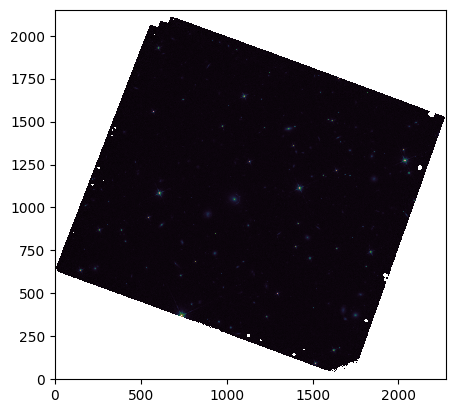

In [3]:
data, header = fits.getdata(
    "/kaggle/input/hst-fits/DESIJ06185018_F140W_drz_sci.fits", header=True
)

plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

## Background estimation

/tmp/ipykernel_17/2220959404.py:23: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background),
/tmp/ipykernel_17/2220959404.py:23: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


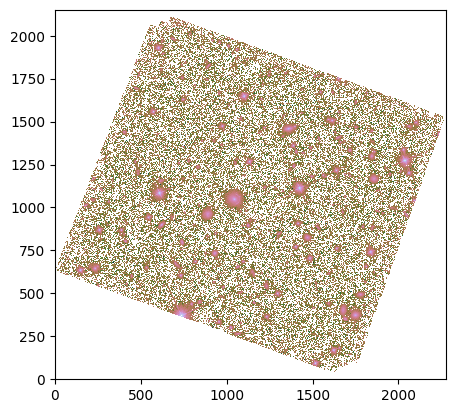

In [4]:
sigma_clip = SigmaClip(sigma=3.0)

bkg_estimator = MedianBackground()

bkg = Background2D(
    data,
    (50, 50),
    filter_size=(3, 3),
    sigma_clip=sigma_clip,
    bkg_estimator=bkg_estimator,
)


plt.imshow(
    np.log10(data - bkg.background),
    origin="lower",
    cmap="cubehelix",
    interpolation="nearest",
)

## Aperture Photometry and Plotting

/tmp/ipykernel_17/3749373674.py:49: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/3749373674.py:49: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2


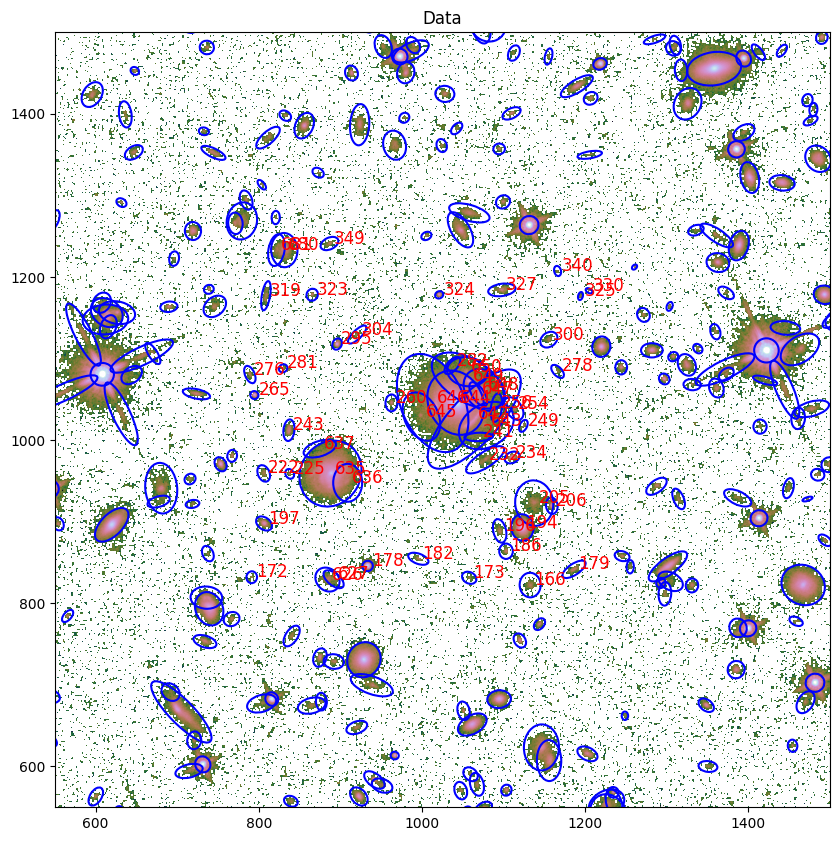

In [5]:
# Background subtraction

bkg_subtracted_data = data - bkg.background


# Source detection and segmentation

threshold = 3 * bkg.background_rms

segment_map = detect_sources(bkg_subtracted_data, threshold, npixels=10)

segm_deblend = deblend_sources(
    bkg_subtracted_data,
    segment_map,
    npixels=8,
    nlevels=32,
    contrast=0.001,
    progress_bar=False,
)


# Source catalog creation

finder = SourceFinder(npixels=10, progress_bar=False)

segment_map = finder(bkg_subtracted_data, threshold)

cat = SourceCatalog(bkg_subtracted_data, segm_deblend)


# Plotting

norm = simple_norm(data, "sqrt")

fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))

ax1.imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)

ax1.set_title("Data")


# Plot Kron apertures and label nearby sources

cat.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

for i in range(len(cat)):
    if (
        np.abs(cat.xcentroid[i] - cat.xcentroid[645]) < 220
        and np.abs(cat.ycentroid[i] - cat.ycentroid[645]) < 220
    ):
        ax1.text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)


# Set axis limits

zoom = -50

set_x_lim1, set_x_lim2 = 600 + zoom, 1450 - zoom

set_y_lim1, set_y_lim2 = 600 + zoom, 1450 - zoom


ax1.set_xlim(set_x_lim1, set_x_lim2)

ax1.set_ylim(set_y_lim1, set_y_lim2)


# Hide text outside of the axes

ax1.set_clip_on(True)

ax1.set_clip_box(ax1.bbox)


# Show the plot

plt.show()

## Identify the central deflector's ID

/tmp/ipykernel_17/559902466.py:19: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background),
/tmp/ipykernel_17/559902466.py:19: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


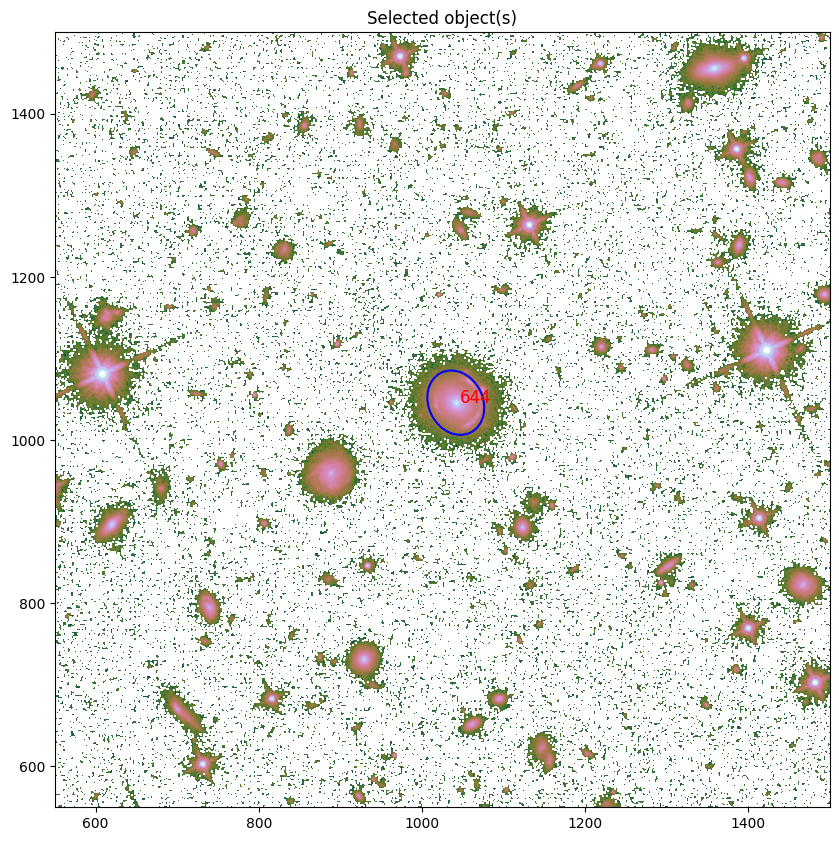

In [6]:
# Defining a function for labeling only selected objects


def label_selected_objects(selected_ids):
    # Background subtraction

    data - bkg.background

    # Plotting

    simple_norm(data, "sqrt")

    fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))

    ax1.imshow(
        np.log10(data - bkg.background),
        origin="lower",
        cmap="cubehelix",
        vmin=-4,
        vmax=2,
    )

    ax1.set_title("Selected object(s)")

    # Plot Kron apertures and label selected objects

    for obj_id in selected_ids:
        labels = [obj_id + 1]

        cat_subset = cat.get_labels(labels)

        cat_subset.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

        ax1.text(
            cat.xcentroid[obj_id] + 5,
            cat.ycentroid[obj_id],
            f"{obj_id}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )

    # Set axis limits

    ax1.set_xlim(set_x_lim1, set_x_lim2)

    ax1.set_ylim(set_y_lim1, set_y_lim2)

    # Hide text outside of the axes

    ax1.set_clip_on(True)

    ax1.set_clip_box(ax1.bbox)

    # Show the plot

    plt.show()


# Guessing the lens galaxy
id_central = 644


# Calling the function label id_central

label_selected_objects([id_central])

In [7]:
# optional format

tbl = cat.to_table()

tbl["xcentroid"].info.format = ".2f"

tbl["ycentroid"].info.format = ".2f"

tbl["kron_flux"].info.format = ".2f"

## Creating A List of Neighboring Galaxies

In [8]:
# All close galaxies

x0 = tbl["xcentroid"].value[id_central]

y0 = tbl["ycentroid"].value[id_central]

f0 = tbl["kron_flux"].value[id_central]


close_galaxies_all = []

dist_galaxies_all = []

flux_galaxies_all = []

axis_ratios_all = []


for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue

    x = tbl["xcentroid"].value[i]

    y = tbl["ycentroid"].value[i]

    f = tbl["kron_flux"].value[i]

    if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 30 / 0.08:
        close_galaxies_all.append(i)

        flux_galaxies_all.append(f)

        dist_galaxies_all.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))

        axis_ratios_all.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))


print(
    "Number of all close galaxies within 30 arcsecond radius:", len(close_galaxies_all)
)

Number of all close galaxies within 30 arcsecond radius: 119


In [9]:
# Close galaxies excluding sources lower than 1% of the central deflector

x0 = tbl["xcentroid"].value[id_central]

y0 = tbl["ycentroid"].value[id_central]

f0 = tbl["kron_flux"].value[id_central]


close_galaxies_1 = []

dist_galaxies_1 = []

flux_galaxies_1 = []

axis_ratios_1 = []


for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue

    x = tbl["xcentroid"].value[i]

    y = tbl["ycentroid"].value[i]

    f = tbl["kron_flux"].value[i]

    if (np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 50 / 0.08) & (f > f0 * 0.01):
        close_galaxies_1.append(i)

        flux_galaxies_1.append(f)

        dist_galaxies_1.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))

        axis_ratios_1.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))

print(
    "Number of close galaxies excluding dim sources within 50 arcsecond radius:",
    len(close_galaxies_1),
)

Number of close galaxies excluding dim sources within 50 arcsecond radius: 95


## Pixels to Megaparsec unit

In [10]:
def distance_parsec(pixel_distance, z):
    """Convert distance from unit of pixels into parsec unit.



    :param pixel_distance: distance in unit of pixels



    :return: distance in parsec unit



    """

    wcs = WCS(header)

    # Get the pixel scale in degrees per pixel

    pix_scale_deg = abs(wcs.wcs.cd[0, 0])

    # Convert the pixel scale from degrees to radians

    pix_scale_radian = pix_scale_deg * np.pi / 180

    # Angles in radians

    angles_radian = pixel_distance * pix_scale_radian

    # Define cosmological parameters

    H0 = 70  # Hubble constant in km/s/Mpc

    Om0 = 0.3  # Matter density parameter

    cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

    # Define the redshifts at which you want to compute the angular diameter distance

    z = 0.581

    # Compute the angular diameter distance

    angular_diameter_distance = cosmo.angular_diameter_distance(z)

    # Calculate the physical distance

    physical_distances_mpc = angular_diameter_distance * angles_radian

    return physical_distances_mpc

## Identify the unwanted objects

/tmp/ipykernel_17/559902466.py:19: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background),
/tmp/ipykernel_17/559902466.py:19: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


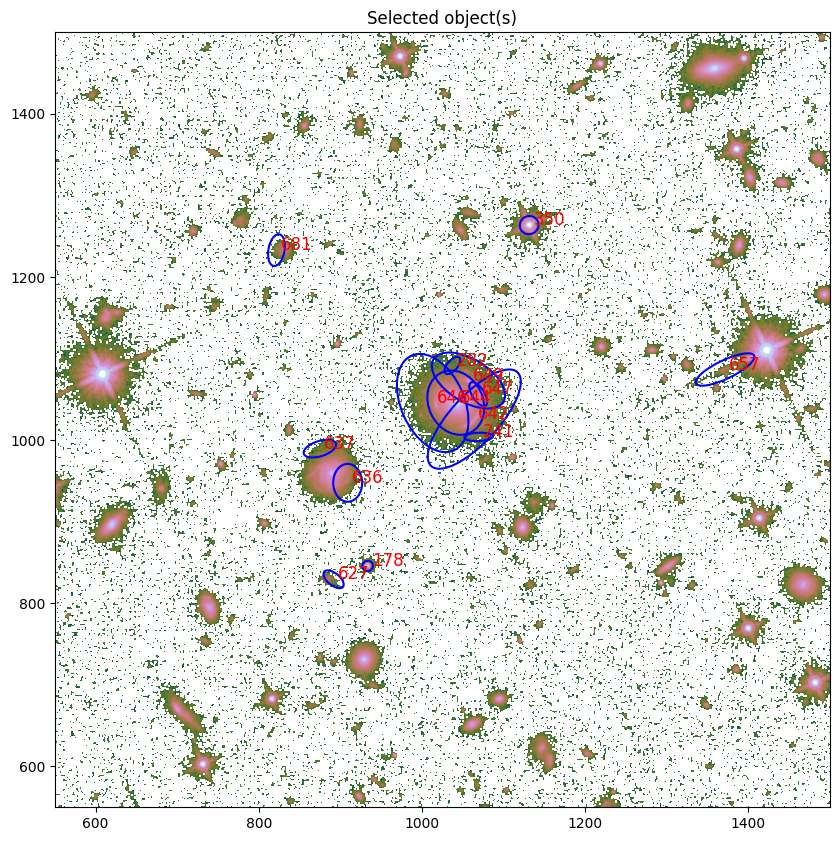

In [ ]:
# unwanted_object_ids = [178, 241, 282, 350, 626,
# 635, 636, 641, 643, 645, 646, 648, 656, 680]


unwanted_object_ids = [
    178,
    241,
    282,
    350,
    627,
    636,
    637,
    642,
    644,
    646,
    647,
    649,
    657,
    681,
]

label_selected_objects(unwanted_object_ids)

## Removing the unwanted objects from the neighboring galaxy list

In [12]:
# All close galaxies

remove_list = [
    178,  # star
    241,  # unnecessary artifact
    282,  # unnecessary artifacts
    350,  # star
    627,  # artifact of 626
    636,  # artifact of 635
    637,  # artifact of 635
    642,  # part of the arc
    644,  # central deflector
    646,  # part of the arc
    647,  # part of the arc
    649,  # part of the arc
    657,  # diffraction spike
    681,  # artifact of 680
    194,  # High redshift: 3706
    289,  # High redshift: 3776
    280,
    175,
    635,
    619,
    124,
    393,
    680,
    683,
    290,
]


df_all = pd.DataFrame({"Distance(pixels)": dist_galaxies_all})


df_all.set_index(pd.Index(close_galaxies_all), inplace=True)


# Photometric redshift of the deflector galaxy is 0.519
df_all["Distance(megaparsec)"] = distance_parsec(df_all["Distance(pixels)"], 0.519)

df_all["Flux"] = flux_galaxies_all

df_all["Axis Ratio"] = axis_ratios_all


# Sort the DataFrame based on 'Distance'

df_all_sorted = df_all.sort_values(by="Distance(pixels)")


# Exclude unwanted sources

df_all_sys_removed = df_all_sorted.drop(remove_list)


# first 20 galaxies

df_all_20 = df_all_sys_removed.iloc[:20]


print(df_all_20.shape)
print(df_all_20)

(20, 4)
     Distance(pixels)  Distance(megaparsec)       Flux  Axis Ratio
648         37.587808              0.019802  98.152119    0.786945
650         40.499925              0.021336  48.155904    0.716356
645         45.456548              0.023947  50.126770    0.661228
643         46.734416              0.024620  75.959013    0.721411
256         50.244410              0.026469  13.244349    0.391556
254         71.460056              0.037646   8.816963    0.614738
232         78.701359              0.041461  15.069388    0.346842
260         78.826650              0.041527   6.627057    0.710900
249         87.571107              0.046133   2.620894    0.566593
234         96.353995              0.050760  16.256545    0.698932
278        130.524527              0.068762   2.565853    0.540374
324        133.767644              0.070470  10.438998    0.848953
300        137.804441              0.072597   5.492211    0.758432
304        146.921980              0.077400   3.240362

In [13]:
# Excluding galaxies lower than 1% of the central deflector

remove_list_1 = [
    178,  # star
    350,  # star
    636,  # artifact of 635
    642,  # part of the arc
    644,  # central deflector
    646,  # part of the arc
    647,  # part of the arc
    649,  # part of the arc
    657,  # diffraction spike
    194,  # High redshift: 3706
    289,  # High redshift: 3776
    280,
    175,
    635,
    619,
    124,
    393,
    680,
    683,
    658,  # diffraction spike
    275,  # star
    113,
    290,
    355,
    250,  # diffraction spike
    266,  # diffraction spike
    704,  # diffraction spike
    346,
    195,  # star
    616,  # star
    259,  # star
    705,  # star
]

df_1 = pd.DataFrame({"Distance(pixels)": dist_galaxies_1})

df_1.set_index(pd.Index(close_galaxies_1), inplace=True)


# Photometric redshift of the deflector galaxy is 0.519
df_1["Distance(megaparsec)"] = distance_parsec(df_1["Distance(pixels)"], 0.519)

df_1["Flux"] = flux_galaxies_1

df_1["Axis Ratio"] = axis_ratios_1


# Sort the DataFrame based on 'Distance'

df_1_sorted = df_1.sort_values(by="Distance(pixels)")


# Exclude the lensing system members

df_1_sys_removed = df_1_sorted.drop(remove_list_1)


# first 20 galaxies

df_1_20 = df_1_sys_removed.iloc[:20]


print(df_1_20.shape)
print(df_1_20)

(20, 4)
     Distance(pixels)  Distance(megaparsec)        Flux  Axis Ratio
648         37.587808              0.019802   98.152119    0.786945
650         40.499925              0.021336   48.155904    0.716356
645         45.456548              0.023947   50.126770    0.661228
643         46.734416              0.024620   75.959013    0.721411
205        156.205228              0.082291   38.200417    0.834625
295        162.284279              0.085493   22.838043    0.788046
352        211.954442              0.111660   44.546541    0.467997
363        233.268784              0.122889   23.246855    0.380471
229        298.018771              0.157000   27.973418    0.736061
168        334.681936              0.176314   28.186371    0.928268
342        364.281896              0.191908   31.848526    0.820527
215        376.003419              0.198083   48.590604    0.628078
396        387.040501              0.203897   33.705773    0.657867
625        388.035319              0.204

## Calculating $\Sigma_{10}$, $\Sigma_{10, \rm flux\ selected}$, $\Sigma_{20}$, $\Sigma_{20, \rm flux\ selected}$ and the corresponding radii

## Loading Global Mean

In [ ]:
# Read flux data from each YAML file and append to corresponding lists

input_path = "/kaggle/input/global-means-updated/DESIJ06185018_means.yml"


try:
    with open(input_path, "r") as f:
        data_mean = yaml.safe_load(f)

except (AttributeError, yaml.YAMLError) as e:
    print(f"Failed to load the file: {e}")


global_mean_flux_10 = data_mean.get("Global_mean_flux_10")

global_mean_flux_20 = data_mean.get("Global_mean_flux_20")

global_mean_flux_selected_10 = data_mean.get("Global_mean_flux_selected_10")

global_mean_flux_selected_20 = data_mean.get("Global_mean_flux_selected_20")

global_mean_flux_dis_10 = data_mean.get("Global_mean_flux_dis_10")

global_mean_flux_dis_20 = data_mean.get("Global_mean_flux_dis_20")

global_mean_flux_dis_selected_10 = data_mean.get("Global_mean_flux_dis_selected_10")

global_mean_flux_dis_selected_20 = data_mean.get("Global_mean_flux_dis_selected_20")

## Generating a distribution of the Physical distance using Monte Carlo random sampling to calculate uncertainty in sigma densities


In [15]:
z = 0.519  # redshift
z_uncertainty = 0.077  # redshift's uncertainty

# Define a function to estimate uncertainty in the Physical distance using
# Monte Carlo random sampling


def calculate_physical_distance_distribution(
    pixel_distance, z, z_uncertainty, num_samples=10000
):
    # Generate random samples of redshift using normal distribution
    z_samples = np.random.normal(z, z_uncertainty, num_samples)

    # Define a function to calculate physical distance
    # from redshift

    def distance_parsec(pixel_distance, z):
        """Convert distance from unit of pixels into parsec unit.

        :param pixel_distance: distance in unit of pixels

        :param z: photometric redshift

        :return: distance in parsec unit

        """

        wcs = WCS(header)

        # Get the pixel scale in degrees per pixel
        pix_scale_deg = abs(wcs.wcs.cd[0, 0])

        # Convert the pixel scale from degrees to radians
        pix_scale_radian = pix_scale_deg * np.pi / 180

        # Angles in radians
        angles_radian = pixel_distance * pix_scale_radian

        # Define cosmological parameters
        H0 = 70  # Hubble constant in km/s/Mpc
        Om0 = 0.3  # Matter density parameter
        cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

        # Compute the angular diameter distance
        angular_diameter_distance = cosmo.angular_diameter_distance(z)

        # Calculate the physical distance
        physical_distances_mpc = angular_diameter_distance * angles_radian

        return physical_distances_mpc.value

    # Calculate physical distances for each sampled redshift and pixel distance
    physical_distances = distance_parsec(pixel_distance, z_samples)

    return physical_distances

## Method A

In [16]:
# # For all sources

# R_10_all = df_all_20.iloc[9, df_all_20.columns.get_loc("Distance(megaparsec)")]
# R_20_all = df_all_20.iloc[19, df_all_20.columns.get_loc("Distance(megaparsec)")]

# Sigma_10_allA = 10 / (np.pi * R_10_all**2)
# Sigma_20_allA = 20 / (np.pi * R_20_all**2)


# # Excluding dim sources

# R_10_1 = df_1_20.iloc[9, df_1_20.columns.get_loc("Distance(megaparsec)")]
# R_20_1 = df_1_20.iloc[19, df_1_20.columns.get_loc("Distance(megaparsec)")]

# Sigma_10_1A = 10 / (np.pi * R_10_1**2)
# Sigma_20_1A = 20 / (np.pi * R_20_1**2)


# print("")

# print("FOR All SOURCES")

# print("R 10:", R_10_all)

# print("R 20:", R_20_all)

# print("Sigma 10:", Sigma_10_allA)

# print("Sigma 20:", Sigma_20_allA)


# print("")

# print("EXCLUDING DIM SOURCES")

# print("R 10:", R_10_1)

# print("R 20:", R_20_1)

# print("Sigma 10:", Sigma_10_1A)
# print("Sigma 20:", Sigma_20_1A)
# For all sources
r_10_all = df_all_20.iloc[9, df_all_20.columns.get_loc("Distance(pixels)")]
R_10_all = calculate_physical_distance_distribution(r_10_all, z, z_uncertainty)

r_20_all = df_all_20.iloc[19, df_all_20.columns.get_loc("Distance(pixels)")]
R_20_all = calculate_physical_distance_distribution(r_20_all, z, z_uncertainty)

Sigma_10_allA_distribution = []
Sigma_20_allA_distribution = []

for i in range(10000):
    Sigma_10_allA = 10 / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allA = 20 / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allA_distribution.append(Sigma_10_allA)
    Sigma_20_allA_distribution.append(Sigma_20_allA)

Sigma_10_allA_mean = np.mean(Sigma_10_allA_distribution)
Sigma_10_allA_std = np.std(Sigma_10_allA_distribution)
Sigma_20_allA_mean = np.mean(Sigma_20_allA_distribution)
Sigma_20_allA_std = np.std(Sigma_20_allA_distribution)

# Excluding dim sources

r_10_1 = df_1_20.iloc[9, df_1_20.columns.get_loc("Distance(pixels)")]
R_10_1 = calculate_physical_distance_distribution(r_10_1, z, z_uncertainty)

r_20_1 = df_1_20.iloc[19, df_1_20.columns.get_loc("Distance(pixels)")]
R_20_1 = calculate_physical_distance_distribution(r_20_1, z, z_uncertainty)

Sigma_10_1A_distribution = []
Sigma_20_1A_distribution = []

for i in range(10000):
    Sigma_10_1A = 10 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1A = 20 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1A_distribution.append(Sigma_10_1A)
    Sigma_20_1A_distribution.append(Sigma_20_1A)

Sigma_10_1A_mean = np.mean(Sigma_10_1A_distribution)
Sigma_10_1A_std = np.std(Sigma_10_1A_distribution)
Sigma_20_1A_mean = np.mean(Sigma_20_1A_distribution)
Sigma_20_1A_std = np.std(Sigma_20_1A_distribution)

print("")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10:", Sigma_10_allA_mean, "Std:", Sigma_10_allA_std)
print("Sigma 20:", Sigma_20_allA_mean, "Std:", Sigma_20_allA_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10:", Sigma_10_1A_mean, "Std:", Sigma_10_1A_std)
print("Sigma 20:", Sigma_20_1A_mean, "Std:", Sigma_20_1A_std)


FOR All SOURCES
R 10: [0.05296544 0.04393738 0.05319643 ... 0.0453663  0.05350701 0.04884844]
R 20: [0.08726934 0.08444565 0.10738759 ... 0.09925765 0.09949097 0.09754351]
Sigma 10: 1431.2098780755075 Std: 256.7941294306992
Sigma 20: 717.9319574124362 Std: 125.75411108947952

EXCLUDING DIM SOURCES
R 10: [0.15996246 0.16070585 0.18823126 ... 0.15261435 0.17106158 0.14913436]
R 20: [0.20402554 0.20940041 0.23098298 ... 0.20122314 0.19528049 0.16918308]
Sigma 10: 118.53101531470041 Std: 21.029967908785398
Sigma 20: 136.50663727319767 Std: 24.262176819342855


## Method B

In [17]:
# weighted_flux_10_all = np.sum(df_all_20["Flux"][0:10])/ global_mean_flux_10

# weighted_flux_20_all = np.sum(df_all_20["Flux"][0:20]) / global_mean_flux_20

# Sigma_10_allB = weighted_flux_10_all / (np.pi * R_10_all**2)

# Sigma_20_allB = weighted_flux_20_all / (np.pi * R_20_all**2)


# weighted_flux_10_1 = np.sum(df_1_20["Flux"][0:10]) / global_mean_flux_selected_10

# weighted_flux_20_1 = np.sum(df_1_20["Flux"][0:20]) / global_mean_flux_selected_20

# Sigma_10_1B = weighted_flux_10_1 / (np.pi * R_10_1**2)

# Sigma_20_1B = weighted_flux_20_1 / (np.pi * R_20_1**2)


# print("")

# print("Considering Light Flux")

# print("FOR All SOURCES")

# print("R 10:", R_10_all)

# print("R 20:", R_20_all)

# print("Sigma 10_updated:", Sigma_10_allB)

# print("Sigma 20_updated:", Sigma_20_allB)


# print("")

# print("EXCLUDING DIM SOURCES")

# print("R 10:", R_10_1)

# print("R 20:", R_20_1)

# print("Sigma 10_updated:", Sigma_10_1B)

# print("Sigma 20_updated:", Sigma_20_1B)

# For all sources
weighted_flux_10_all = np.sum(df_all_20["Flux"][0:10]) / global_mean_flux_10
weighted_flux_20_all = np.sum(df_all_20["Flux"][0:20]) / global_mean_flux_20

Sigma_10_allB_distribution = []
Sigma_20_allB_distribution = []

for i in range(10000):
    Sigma_10_allB = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allB = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allB_distribution.append(Sigma_10_allB)
    Sigma_20_allB_distribution.append(Sigma_20_allB)

Sigma_10_allB_mean = np.mean(Sigma_10_allB_distribution)
Sigma_10_allB_std = np.std(Sigma_10_allB_distribution)
Sigma_20_allB_mean = np.mean(Sigma_20_allB_distribution)
Sigma_20_allB_std = np.std(Sigma_20_allB_distribution)

# excluding dim sources
weighted_flux_10_1 = np.sum(df_1_20["Flux"][0:10]) / global_mean_flux_selected_10
weighted_flux_20_1 = np.sum(df_1_20["Flux"][0:20]) / global_mean_flux_selected_20

Sigma_10_1B_distribution = []
Sigma_20_1B_distribution = []

for i in range(10000):
    Sigma_10_1B = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1B = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1B_distribution.append(Sigma_10_1B)
    Sigma_20_1B_distribution.append(Sigma_20_1B)

Sigma_10_1B_mean = np.mean(Sigma_10_1B_distribution)
Sigma_10_1B_std = np.std(Sigma_10_1B_distribution)
Sigma_20_1B_mean = np.mean(Sigma_20_1B_distribution)
Sigma_20_1B_std = np.std(Sigma_20_1B_distribution)


print("")
print("Considering Light Flux")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allB_mean, "Std:", Sigma_10_allB_std)
print("Sigma 20_updated:", Sigma_20_allB_mean, "Std:", Sigma_20_allB_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1B_mean, "Std:", Sigma_10_1B_std)
print("Sigma 20_updated:", Sigma_20_1B_mean, "Std:", Sigma_20_1B_std)


Considering Light Flux
FOR All SOURCES
R 10: [0.05296544 0.04393738 0.05319643 ... 0.0453663  0.05350701 0.04884844]
R 20: [0.08726934 0.08444565 0.10738759 ... 0.09925765 0.09949097 0.09754351]
Sigma 10_updated: 674.6625685801483 Std: 121.05100000496103
Sigma 20_updated: 251.83019867643773 Std: 44.110980787347074

EXCLUDING DIM SOURCES
R 10: [0.15996246 0.16070585 0.18823126 ... 0.15261435 0.17106158 0.14913436]
R 20: [0.20402554 0.20940041 0.23098298 ... 0.20122314 0.19528049 0.16918308]
Sigma 10_updated: 25.34865446281642 Std: 4.497400013562571
Sigma 20_updated: 42.84253515417814 Std: 7.614671228178242


## Method C

In [18]:
# flux_d_10_all = []

# flux_d_20_all = []

# flux_d_10_1 = []

# flux_d_20_1 = []


# # for all sources

# for i in range(20):

#     flux_all = df_all_20["Flux"][i:i+1] / df_all_20["Distance(megaparsec)"][i:i+1]


#     if i < 10:

#         flux_d_10_all.append(flux_all)

#         flux_d_20_all.append(flux_all)


#     elif 9 < i < 20:

#         flux_d_20_all.append(flux_all)


# weighted_flux_10_all = np.sum(flux_d_10_all) / global_mean_flux_dis_10

# weighted_flux_20_all = np.sum(flux_d_20_all) / global_mean_flux_dis_20

# Sigma_10_allC = weighted_flux_10_all  / (np.pi * R_10_all**2)

# Sigma_20_allC = weighted_flux_20_all / (np.pi * R_20_all**2)


# # excluding dim sources

# for i in range(20):

#     flux_1 = df_1_20["Flux"][i:i+1] / df_1_20["Distance(megaparsec)"][i:i+1]


#     if i < 10:

#         flux_d_10_1.append(flux_1)

#         flux_d_20_1.append(flux_1)


#     elif 9 < i < 20:

#         flux_d_20_1.append(flux_1)


# weighted_flux_10_1 = np.sum(flux_d_10_1) / global_mean_flux_dis_selected_10

# weighted_flux_20_1 = np.sum(flux_d_20_1) / global_mean_flux_dis_selected_20

# Sigma_10_1C = weighted_flux_10_1 / (np.pi * R_10_1**2)

# Sigma_20_1C = weighted_flux_20_1 / (np.pi * R_20_1**2)


# print("")

# print("Considering Light Flux And Distance")

# print("FOR All SOURCES")

# print("R 10:", R_10_all)

# print("R 20:", R_20_all)

# print("Sigma 10_updated:", Sigma_10_allC)

# print("Sigma 20_updated:", Sigma_20_allC)


# print("")

# print("EXCLUDING DIM SOURCES")

# print("R 10:", R_10_1)

# print("R 20:", R_20_1)

# print("Sigma 10_updated:", Sigma_10_1C)

# print("Sigma 20_updated:", Sigma_20_1C)

flux_c_10_all = []
flux_c_20_all = []
flux_c_10_1 = []
flux_c_20_1 = []

# for all sources
for i in range(20):
    flux_all = (
        df_all_20["Flux"][i : i + 1] / df_all_20["Distance(megaparsec)"][i : i + 1]
    )

    if i < 10:
        flux_c_10_all.append(flux_all)
        flux_c_20_all.append(flux_all)

    elif 9 < i < 20:
        flux_c_20_all.append(flux_all)

weighted_flux_10_all = np.sum(flux_c_10_all) / global_mean_flux_dis_10
weighted_flux_20_all = np.sum(flux_c_20_all) / global_mean_flux_dis_20

Sigma_10_allC_distribution = []
Sigma_20_allC_distribution = []

for i in range(10000):
    Sigma_10_allC = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allC = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allC_distribution.append(Sigma_10_allC)
    Sigma_20_allC_distribution.append(Sigma_20_allC)

Sigma_10_allC_mean = np.mean(Sigma_10_allC_distribution)
Sigma_10_allC_std = np.std(Sigma_10_allC_distribution)
Sigma_20_allC_mean = np.mean(Sigma_20_allC_distribution)
Sigma_20_allC_std = np.std(Sigma_20_allC_distribution)


# excluding dim sources
for i in range(20):
    flux_1 = df_1_20["Flux"][i : i + 1] / df_1_20["Distance(megaparsec)"][i : i + 1]

    if i < 10:
        flux_c_10_1.append(flux_1)
        flux_c_20_1.append(flux_1)

    elif 9 < i < 20:
        flux_c_20_1.append(flux_1)

weighted_flux_10_1 = np.sum(flux_c_10_1) / global_mean_flux_dis_selected_10
weighted_flux_20_1 = np.sum(flux_c_20_1) / global_mean_flux_dis_selected_20

Sigma_10_1C_distribution = []
Sigma_20_1C_distribution = []

for i in range(10000):
    Sigma_10_1C = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1C = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1C_distribution.append(Sigma_10_1C)
    Sigma_20_1C_distribution.append(Sigma_20_1C)

Sigma_10_1C_mean = np.median(Sigma_10_1C_distribution)
Sigma_10_1C_std = np.std(Sigma_10_1C_distribution)
Sigma_20_1C_mean = np.median(Sigma_20_1C_distribution)
Sigma_20_1C_std = np.std(Sigma_20_1C_distribution)

print("")
print("Considering Light Flux And Distance")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allC_mean, "Std:", Sigma_10_allC_std)
print("Sigma 20_updated:", Sigma_20_allC_mean, "Std:", Sigma_20_allC_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1C_mean, "Std:", Sigma_10_1C_std)
print("Sigma 20_updated:", Sigma_20_1C_mean, "Std:", Sigma_20_1C_std)


Considering Light Flux And Distance
FOR All SOURCES
R 10: [0.05296544 0.04393738 0.05319643 ... 0.0453663  0.05350701 0.04884844]
R 20: [0.08726934 0.08444565 0.10738759 ... 0.09925765 0.09949097 0.09754351]
Sigma 10_updated: 1881.4421431256808 Std: 337.57683245440717
Sigma 20_updated: 626.255165163841 Std: 109.69585738211043

EXCLUDING DIM SOURCES
R 10: [0.15996246 0.16070585 0.18823126 ... 0.15261435 0.17106158 0.14913436]
R 20: [0.20402554 0.20940041 0.23098298 ... 0.20122314 0.19528049 0.16918308]
Sigma 10_updated: 71.92317538264982 Std: 13.206787256941709
Sigma 20_updated: 75.36290152048727 Std: 13.890109546881755


## Method D

In [19]:
# # Initialize flux variables

# flux_d_10_all = []
# flux_d_20_all = []
# flux_d_10_1 = []
# flux_d_20_1 = []


# # Define a short radius
# pixel_distance = 125 # for 10 arcseconds

# # Mean Photometric redshift of all the deflectors is 0.581
# s = distance_parsec(pixel_distance, 0.581).value


# # Process both dataframes

# for i in range(20):

#     distance_all = df_all_20["Distance(megaparsec)"].iloc[i]

#     flux_all = df_all_20["Flux"].iloc[i]

#     distance_1 = df_1_20["Distance(megaparsec)"].iloc[i]

#     flux_1 = df_1_20["Flux"].iloc[i]


#     # Processing for df_all_20

#     if i < 10:

#         if distance_all <= s:

#             flux_contrib_all = flux_all / s

#         else:

#             flux_contrib_all = flux_all / distance_all


#         flux_d_10_all.append(flux_contrib_all)

#         flux_d_20_all.append(flux_contrib_all)


#     elif 9 < i < 20:

#         if distance_all <= s:

#             flux_contrib_all = flux_all / s

#         else:

#             flux_contrib_all = flux_all / distance_all


#         flux_d_20_all.append(flux_contrib_all)


#     # Processing for df_1_20

#     if i < 10:


#         if distance_1 <= s:

#             flux_contrib_1 = flux_1 / s

#         else:

#             flux_contrib_1 = flux_1 / distance_1


#         flux_d_10_1.append(flux_contrib_1)

#         flux_d_20_1.append(flux_contrib_1)


#     elif 9 < i < 20:

#         if distance_1 <= s:

#             flux_contrib_1 = flux_1 / s

#         else:

#             flux_contrib_1 = flux_1 / distance_1


#         flux_d_20_1.append(flux_contrib_1)


# weighted_flux_10_all = np.sum(flux_d_10_all) /global_mean_flux_dis_10

# weighted_flux_20_all = np.sum(flux_d_20_all) / global_mean_flux_dis_20

# Sigma_10_allD = weighted_flux_10_all / (np.pi * R_10_all**2)

# Sigma_20_allD = weighted_flux_20_all / (np.pi * R_20_all**2)


# weighted_flux_10_1 = np.sum(flux_d_10_1) / global_mean_flux_dis_selected_10

# weighted_flux_20_1 = np.sum(flux_d_20_1) / global_mean_flux_dis_selected_20

# Sigma_10_1D = weighted_flux_10_1 / (np.pi * R_10_1**2)

# Sigma_20_1D = weighted_flux_20_1 / (np.pi * R_20_1**2)


# # Print results
# print("")
# print("Considering Light Flux And Distance")
# print("FOR All SOURCES")
# print("R 10:", R_10_all)
# print("R 20:", R_20_all)
# print("Sigma 10_updated:", Sigma_10_allD)
# print("Sigma 20_updated:", Sigma_20_allD)


# print("")
# print("EXCLUDING DIM SOURCES")
# print("R 10:", R_10_1)
# print("R 20:", R_20_1)
# print("Sigma 10_updated:", Sigma_10_1D)
# print("Sigma 20_updated:", Sigma_20_1D)

# Initialize flux variables
flux_d_10_all = []
flux_d_20_all = []
flux_d_10_1 = []
flux_d_20_1 = []

# Define a short radius
pixel_distance = 125  # for 10 arcseconds

# Mean Photometric redshift of all the deflectors is 0.581
s = distance_parsec(pixel_distance, 0.581).value

# Process both dataframes
for i in range(20):
    distance_all = df_all_20["Distance(megaparsec)"].iloc[i]
    flux_all = df_all_20["Flux"].iloc[i]
    distance_1 = df_1_20["Distance(megaparsec)"].iloc[i]
    flux_1 = df_1_20["Flux"].iloc[i]

    # Processing for df_all_20
    if i < 10:
        if distance_all <= s:
            flux_contrib_all = flux_all / s
        else:
            flux_contrib_all = flux_all / distance_all

        flux_d_10_all.append(flux_contrib_all)
        flux_d_20_all.append(flux_contrib_all)

    elif 9 < i < 20:
        if distance_all <= s:
            flux_contrib_all = flux_all / s
        else:
            flux_contrib_all = flux_all / distance_all

        flux_d_20_all.append(flux_contrib_all)

    # Processing for df_1_20
    if i < 10:
        if distance_1 <= s:
            flux_contrib_1 = flux_1 / s
        else:
            flux_contrib_1 = flux_1 / distance_1

        flux_d_10_1.append(flux_contrib_1)
        flux_d_20_1.append(flux_contrib_1)

    elif 9 < i < 20:
        if distance_1 <= s:
            flux_contrib_1 = flux_1 / s
        else:
            flux_contrib_1 = flux_1 / distance_1

        flux_d_20_1.append(flux_contrib_1)

weighted_flux_10_all = np.sum(flux_d_10_all) / global_mean_flux_dis_10
weighted_flux_20_all = np.sum(flux_d_20_all) / global_mean_flux_dis_20

Sigma_10_allD_distribution = []
Sigma_20_allD_distribution = []

for i in range(10000):
    Sigma_10_allD = weighted_flux_10_all / (np.pi * R_10_all[i] ** 2)
    Sigma_20_allD = weighted_flux_20_all / (np.pi * R_20_all[i] ** 2)

    Sigma_10_allD_distribution.append(Sigma_10_allD)
    Sigma_20_allD_distribution.append(Sigma_20_allD)

Sigma_10_allD_mean = np.median(Sigma_10_allD_distribution)
Sigma_10_allD_std = np.std(Sigma_10_allD_distribution)
Sigma_20_allD_mean = np.median(Sigma_20_allD_distribution)
Sigma_20_allD_std = np.std(Sigma_20_allD_distribution)

# Excluding dim sources
weighted_flux_10_1 = np.sum(flux_d_10_1) / global_mean_flux_dis_selected_10
weighted_flux_20_1 = np.sum(flux_d_20_1) / global_mean_flux_dis_selected_20


Sigma_10_1D_distribution = []
Sigma_20_1D_distribution = []

for i in range(10000):
    Sigma_10_1D = weighted_flux_10_1 / (np.pi * R_10_1[i] ** 2)
    Sigma_20_1D = weighted_flux_20_1 / (np.pi * R_20_1[i] ** 2)

    Sigma_10_1D_distribution.append(Sigma_10_1D)
    Sigma_20_1D_distribution.append(Sigma_20_1D)

Sigma_10_1D_mean = np.mean(Sigma_10_1D_distribution)
Sigma_10_1D_std = np.std(Sigma_10_1D_distribution)
Sigma_20_1D_mean = np.mean(Sigma_20_1D_distribution)
Sigma_20_1D_std = np.std(Sigma_20_1D_distribution)

# Print results
print("")
print("Considering Light Flux And Distance")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10_updated:", Sigma_10_allD_mean, "Std:", Sigma_10_allD_std)
print("Sigma 20_updated:", Sigma_20_allD_mean, "Std:", Sigma_20_allD_std)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10_updated:", Sigma_10_1D_mean, "Std:", Sigma_10_1D_std)
print("Sigma 20_updated:", Sigma_20_1D_mean, "Std:", Sigma_20_1D_std)


Considering Light Flux And Distance
FOR All SOURCES
R 10: [0.05296544 0.04393738 0.05319643 ... 0.0453663  0.05350701 0.04884844]
R 20: [0.08726934 0.08444565 0.10738759 ... 0.09925765 0.09949097 0.09754351]
Sigma 10_updated: 660.3664583194662 Std: 122.44087689200427
Sigma 20_updated: 257.8625834044765 Std: 46.6309624063464

EXCLUDING DIM SOURCES
R 10: [0.15996246 0.16070585 0.18823126 ... 0.15261435 0.17106158 0.14913436]
R 20: [0.20402554 0.20940041 0.23098298 ... 0.20122314 0.19528049 0.16918308]
Sigma 10_updated: 30.697250187068043 Std: 5.44635667388849
Sigma 20_updated: 40.48111468754387 Std: 7.194961226886276


## Visualization

/tmp/ipykernel_17/1494786481.py:39: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1494786481.py:39: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1494786481.py:45: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1494786481.py:45: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1494786481.py:51: RuntimeWarning: divide by zero encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_17/1494786481.py:51: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower",

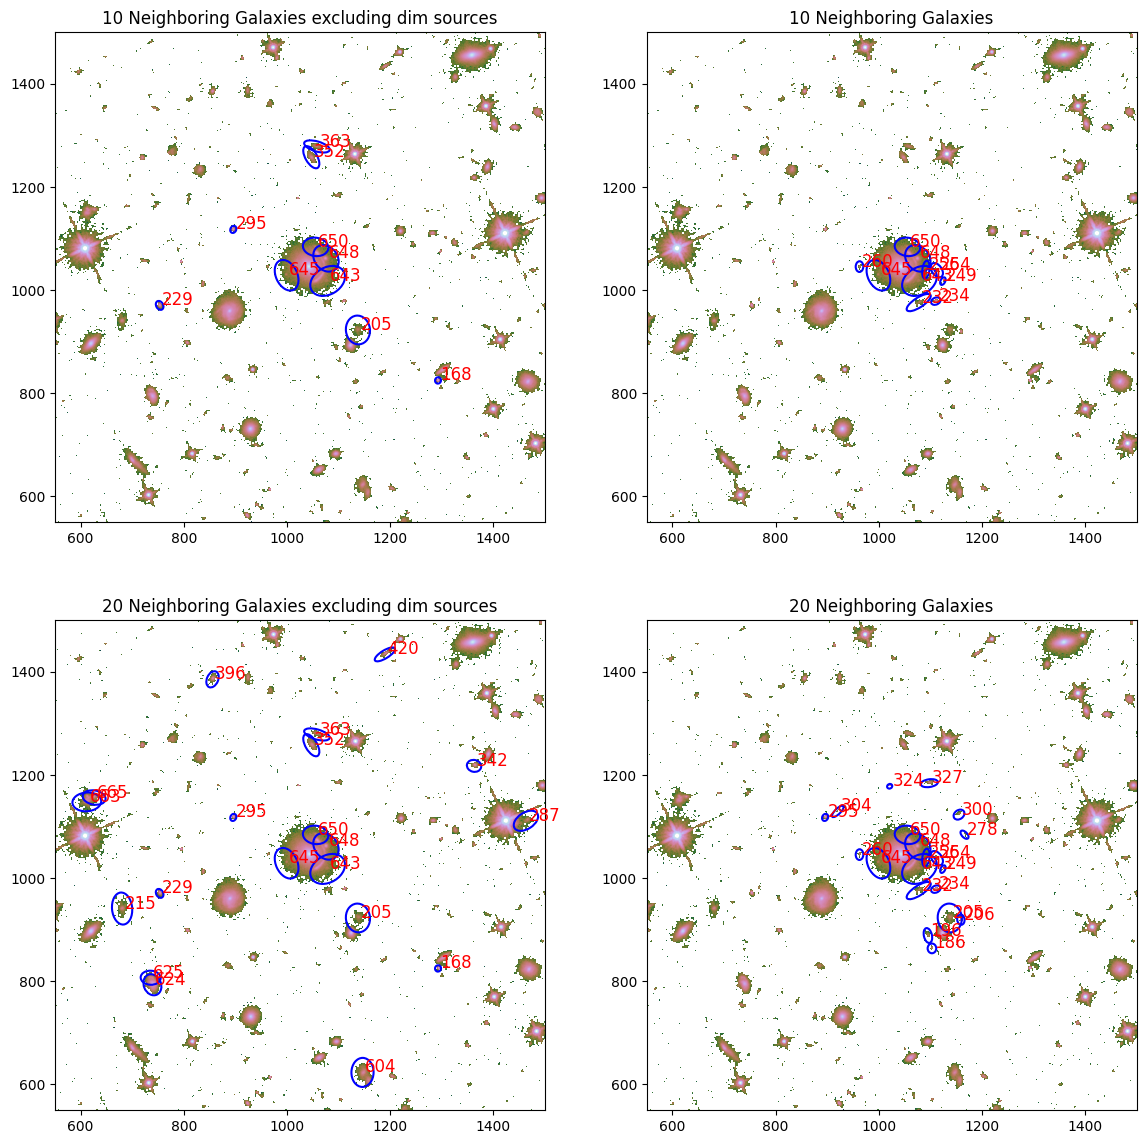

In [20]:
close_ids_all = list(df_all_20.index.values)

# close_ids_all.pop(19)

close_ids_all_10 = close_ids_all[:10]

# close_ids_all_10.pop(9)


updated_close_ids_all = [s + 1 for s in close_ids_all]

updated_close_ids_all_10 = updated_close_ids_all[:10]


close_ids_1 = list(df_1_20.index.values)

close_ids_1_10 = close_ids_1[:10]


updated_close_ids_1 = [s + 1 for s in close_ids_1]

updated_close_ids_1_10 = updated_close_ids_1[:10]


simple_norm(data, "sqrt")

fig, axs = plt.subplots(2, 2, figsize=(14, 14))


axs[0, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)

axs[0, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)

axs[1, 0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)

axs[1, 1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)


cat_subset_1_10 = cat.get_labels(updated_close_ids_1_10)

cat_subset_1_10.plot_kron_apertures(ax=axs[0, 0], color="blue", lw=1.5)


cat_subset_all_10 = cat.get_labels(updated_close_ids_all_10)

cat_subset_all_10.plot_kron_apertures(ax=axs[0, 1], color="blue", lw=1.5)


cat_subset_all = cat.get_labels(updated_close_ids_1)

cat_subset_all.plot_kron_apertures(ax=axs[1, 0], color="blue", lw=1.5)


cat_subset_1 = cat.get_labels(updated_close_ids_all)

cat_subset_1.plot_kron_apertures(ax=axs[1, 1], color="blue", lw=1.5)


axs[0, 0].set_title("10 Neighboring Galaxies excluding dim sources")

axs[0, 1].set_title("10 Neighboring Galaxies")

axs[1, 0].set_title("20 Neighboring Galaxies excluding dim sources")

axs[1, 1].set_title("20 Neighboring Galaxies")


for i in close_ids_1_10:
    axs[0, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)


for i in close_ids_all_10:
    axs[0, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)


for i in close_ids_1:
    axs[1, 0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)


for i in close_ids_all:
    axs[1, 1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)


axs[0, 0].set_xlim(set_x_lim1, set_x_lim2)

axs[0, 0].set_ylim(set_y_lim1, set_y_lim2)


axs[0, 1].set_xlim(set_x_lim1, set_x_lim2)

axs[0, 1].set_ylim(set_y_lim1, set_y_lim2)


axs[1, 0].set_xlim(set_x_lim1, set_x_lim2)

axs[1, 0].set_ylim(set_y_lim1, set_y_lim2)


axs[1, 1].set_xlim(set_x_lim1, set_x_lim2)

axs[1, 1].set_ylim(set_y_lim1, set_y_lim2)


# hide all text outside of the axes

axs[0, 0].set_clip_on(True)

axs[0, 0].set_clip_box(axs[0, 0].bbox)


axs[0, 1].set_clip_on(True)

axs[0, 1].set_clip_box(axs[0, 0].bbox)


axs[1, 0].set_clip_on(True)

axs[1, 0].set_clip_box(axs[0, 0].bbox)


axs[1, 1].set_clip_on(True)

axs[1, 1].set_clip_box(axs[0, 0].bbox)

## Store the results to the YAML file

In [21]:
# convert the numpy.float64 values to floats

Sigma_10_1A_mean = Sigma_10_1A_mean.item()
Sigma_20_1A_mean = Sigma_20_1A_mean.item()
Sigma_10_allA_mean = Sigma_10_allA_mean.item()
Sigma_20_allA_mean = Sigma_20_allA_mean.item()
Sigma_10_1A_std = Sigma_10_1A_std.item()
Sigma_20_1A_std = Sigma_20_1A_std.item()
Sigma_10_allA_std = Sigma_10_allA_std.item()
Sigma_20_allA_std = Sigma_20_allA_std.item()

Sigma_10_1B_mean = Sigma_10_1B_mean.item()
Sigma_20_1B_mean = Sigma_20_1B_mean.item()
Sigma_10_allB_mean = Sigma_10_allB_mean.item()
Sigma_20_allB_mean = Sigma_20_allB_mean.item()
Sigma_10_1B_std = Sigma_10_1B_std.item()
Sigma_20_1B_std = Sigma_20_1B_std.item()
Sigma_10_allB_std = Sigma_10_allB_std.item()
Sigma_20_allB_std = Sigma_20_allB_std.item()

Sigma_10_1C_mean = Sigma_10_1C_mean.item()
Sigma_20_1C_mean = Sigma_20_1C_mean.item()
Sigma_10_allC_mean = Sigma_10_allC_mean.item()
Sigma_20_allC_mean = Sigma_20_allC_mean.item()
Sigma_10_1C_std = Sigma_10_1C_std.item()
Sigma_20_1C_std = Sigma_20_1C_std.item()
Sigma_10_allC_std = Sigma_10_allC_std.item()
Sigma_20_allC_std = Sigma_20_allC_std.item()

Sigma_10_1D_mean = Sigma_10_1D_mean.item()
Sigma_20_1D_mean = Sigma_20_1D_mean.item()
Sigma_10_allD_mean = Sigma_10_allD_mean.item()
Sigma_20_allD_mean = Sigma_20_allD_mean.item()
Sigma_10_1D_std = Sigma_10_1D_std.item()
Sigma_20_1D_std = Sigma_20_1D_std.item()
Sigma_10_allD_std = Sigma_10_allD_std.item()
Sigma_20_allD_std = Sigma_20_allD_std.item()

In [22]:
src_path = r"/kaggle/input/point-estimatess/DESIJ06185018_point_estimates.yml"

dst_path = r"/kaggle/working/"

shutil.copy(src_path, dst_path)


# Existing YAML file with other parameters

existing_yaml_file = "DESIJ06185018_point_estimates.yml"


# Variables to include in the YAML file
environment_variables = {
    "Sigma_10a_flux_selected": [Sigma_10_1A_mean, Sigma_10_1A_std],
    "Sigma_20a_flux_selected": [Sigma_20_1A_mean, Sigma_20_1A_std],
    "Sigma_10a": [Sigma_10_allA_mean, Sigma_10_allA_std],
    "Sigma_20a": [Sigma_20_allA_mean, Sigma_20_allA_std],
    "Sigma_10b_flux_selected": [Sigma_10_1B_mean, Sigma_10_1B_std],
    "Sigma_20b_flux_selected": [Sigma_20_1B_mean, Sigma_20_1B_std],
    "Sigma_10b": [Sigma_10_allB_mean, Sigma_10_allB_std],
    "Sigma_20b": [Sigma_20_allB_mean, Sigma_20_allB_std],
    "Sigma_10c_flux_selected": [Sigma_10_1C_mean, Sigma_10_1C_std],
    "Sigma_20c_flux_selected": [Sigma_20_1C_mean, Sigma_20_1C_std],
    "Sigma_10c": [Sigma_10_allC_mean, Sigma_10_allC_std],
    "Sigma_20c": [Sigma_20_allC_mean, Sigma_20_allC_std],
    "Sigma_10d_flux_selected": [Sigma_10_1D_mean, Sigma_10_1D_std],
    "Sigma_20d_flux_selected": [Sigma_20_1D_mean, Sigma_20_1D_std],
    "Sigma_10d": [Sigma_10_allD_mean, Sigma_10_allD_std],
    "Sigma_20d": [Sigma_20_allD_mean, Sigma_20_allD_std],
}


# make all the numpy variales to float

environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}


# Load existing YAML content if the file exists

existing_content = {}

try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)

except FileNotFoundError:
    pass


# Update the existing content with new variables

existing_content.update(environment_variables)


# Write the updated content back to the YAML file

with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)

In [23]:
with open(existing_yaml_file, "r") as file:
    try:
        yaml_read = yaml.safe_load(file)

        print("YAML Data:")

        print("Number of params:", len(list(yaml_read.keys())))

        print(yaml_read)

    except yaml.YAMLError as e:
        print(f"Error reading YAML file: {e}")

YAML Data:
Number of params: 32
{'R_eff_light': 0.8194236223102188, 'Sigma_10a': [1431.2098780755075, 256.7941294306992], 'Sigma_10a_flux_selected': [118.53101531470041, 21.029967908785398], 'Sigma_10b': [674.6625685801483, 121.05100000496103], 'Sigma_10b_flux_selected': [25.34865446281642, 4.497400013562571], 'Sigma_10c': [1881.4421431256808, 337.57683245440717], 'Sigma_10c_flux_selected': [71.92317538264982, 13.206787256941709], 'Sigma_10d': [660.3664583194662, 122.44087689200427], 'Sigma_10d_flux_selected': [30.697250187068043, 5.44635667388849], 'Sigma_20a': [717.9319574124362, 125.75411108947952], 'Sigma_20a_flux_selected': [136.50663727319767, 24.262176819342855], 'Sigma_20b': [251.83019867643773, 44.110980787347074], 'Sigma_20b_flux_selected': [42.84253515417814, 7.614671228178242], 'Sigma_20c': [626.255165163841, 109.69585738211043], 'Sigma_20c_flux_selected': [75.36290152048727, 13.890109546881755], 'Sigma_20d': [257.8625834044765, 46.6309624063464], 'Sigma_20d_flux_selected':

## Determining the mean for normalizing

In [24]:
# Mean of Fluxes

flux_10_mean = np.mean(df_all_20["Flux"][0:9])

flux_20_mean = np.mean(df_all_20["Flux"][0:19])

flux_10_1_mean = np.mean(df_1_20["Flux"][0:9])

flux_20_1_mean = np.mean(df_1_20["Flux"][0:19])


# Mean of Flux/Distance

flux_d_10_mean = np.mean(flux_d_10_all)

flux_d_20_mean = np.mean(flux_d_20_all)

flux_d_10_1_mean = np.mean(flux_d_10_1)

flux_d_20_1_mean = np.mean(flux_d_20_1)


print(flux_10_mean, flux_20_mean, flux_10_1_mean, flux_20_1_mean)

print(flux_d_10_mean, flux_d_20_mean, flux_d_10_1_mean, flux_d_20_1_mean)

35.41916195858418 23.898475470979083 47.688786835111756 54.41616932741688
508.7649749451163 330.4916416731346 579.3993787767827 443.604582871582


In [25]:
mean_variables = {
    "Flux_10b_mean": flux_10_mean,
    "Flux_20b_mean": flux_20_mean,
    "Flux_selected_10b_mean": flux_10_1_mean,
    "Flux_selected_20b_mean": flux_20_1_mean,
    "Flux_dis_10_mean": flux_d_10_mean,
    "Flux_dis_20_mean": flux_d_20_mean,
    "Flux_dis_10_1_mean": flux_d_10_1_mean,
    "Flux_dis_20_1_mean": flux_d_20_1_mean,
}


# make all the numpy variales to float

mean_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in mean_variables.items()
}

In [26]:
# Write the dictionary to a YAML file

yaml_file_name = "DESIJ0618+5018_means.yml"

with open(yaml_file_name, "w") as yaml_file:
    yaml.dump(mean_variables, yaml_file, default_flow_style=False)

print(f"YAML file '{yaml_file_name}' created successfully.")

YAML file 'DESIJ0618+5018_means.yml' created successfully.
